In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'/content/Churn_Modelling.csv')


In [5]:
df.shape
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


0

In [7]:
df.isnull().sum()
df.isnull().sum().sum()

0

In [8]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
print(df.Geography.value_counts())
df.Gender.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#converting categorical columns into numericals

df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)  # droping one column from column after one hot encoding

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'Exited')
y = df.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.summary()   # gives idea about total numbers of weights and biases in neural network....

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 3)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [19]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.6280 - accuracy: 0.6408 - val_loss: 0.5033 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7972 - val_loss: 0.4424 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4357 - accuracy: 0.7987 - val_loss: 0.4251 - val_accuracy: 0.8012
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4219 - accuracy: 0.8108 - val_loss: 0.4134 - val_accuracy: 0.8175
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8250 - val_loss: 0.3997 - val_accuracy: 0.8288
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3978 - accuracy: 0.8302 - val_loss: 0.3864 - val_accuracy: 0.8381
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8350 - val_loss: 0.3750 - val_accuracy: 0.8456

In [20]:
print(model.layers[0].get_weights()[0])    # gives weights of first hidden layers
print(model.layers[0].get_weights()[1])   # gives biases for first hidden layers

print(model.layers[1].get_weights()[0])   # same as above
print(model.layers[1].get_weights()[1])

[[-0.17791483 -0.00275782 -0.18033165 -0.118671    0.33033592  0.3720197
  -0.03452702  0.1256516  -0.06815733  0.52008235 -0.16047767]
 [-0.16136676  0.7490555   0.07264992 -0.08596963  0.48377416 -0.08963767
  -0.7971787  -0.61022866 -0.14368892 -0.6285553   1.0099412 ]
 [-0.16190673  0.2657697  -0.18007919 -0.54798776  0.05371463  0.08481893
   0.02484813 -0.05223249 -0.24520555 -0.24687526 -0.0451361 ]
 [-0.580229   -0.07142835  0.62436724  0.11644281 -0.00723722 -0.07047056
  -0.1644544   0.04097748  0.04082789 -0.07941382 -0.40291795]
 [-1.0302594   0.47250298  0.76788557 -0.17022532  1.2566311  -0.94238883
   0.05694114  0.09013264  0.2977544  -0.16124663 -0.40780354]
 [ 0.00452416  0.17894417  0.03194445 -0.02768488  0.22886063  0.13920036
  -0.02221313  0.01915088  0.08541223  0.38656798 -0.16372082]
 [-0.14804953  0.9708063  -0.17274924  0.36997     0.01397595 -0.79781485
  -0.4009261  -0.10620259 -0.15138036 -0.7073873   0.1000995 ]
 [-0.01331713  0.1669454   0.09730383 -0.1

In [21]:
y_log_train = model.predict(X_train_scaled)
X_train_scaled.shape
X_test_scaled.shape
#y_train.shape
#y_test.shape
y_test.shape

250/250 [==============================] - 0s 1ms/step


(2000,)

In [22]:
y_pred = np.where(y_log_train > 0.5, 1, 0)
y_train.shape


(8000,)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)       # giving accuracy over training data

0.862875

In [24]:
history.history    # gives a dictionary

{'loss': [0.6280363202095032,
  0.4681144654750824,
  0.4357471168041229,
  0.421912282705307,
  0.4096479117870331,
  0.39780929684638977,
  0.3857755959033966,
  0.37498852610588074,
  0.3666583299636841,
  0.36060020327568054,
  0.35658934712409973,
  0.3540100157260895,
  0.3518695533275604,
  0.35052013397216797,
  0.3497084677219391,
  0.3484090566635132,
  0.3480182886123657,
  0.34723418951034546,
  0.34669172763824463,
  0.34614574909210205,
  0.3455656170845032,
  0.34517523646354675,
  0.34478989243507385,
  0.34459826350212097,
  0.3444534242153168,
  0.3435829281806946,
  0.34369513392448425,
  0.34342536330223083,
  0.34294241666793823,
  0.3426486551761627,
  0.342060387134552,
  0.34178802371025085,
  0.3416164815425873,
  0.34158244729042053,
  0.3409803509712219,
  0.3412254750728607,
  0.34068363904953003,
  0.34075695276260376,
  0.34025755524635315,
  0.34044215083122253,
  0.3395344018936157,
  0.3391256034374237,
  0.339050829410553,
  0.339049756526947,
  0.3392

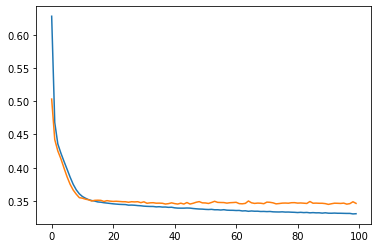

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

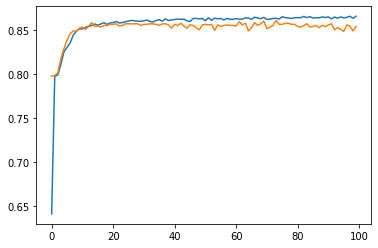

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])